# Домашнее задание  
## "Временные ряды, общая теория"


In [1]:
import pandas as pd

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

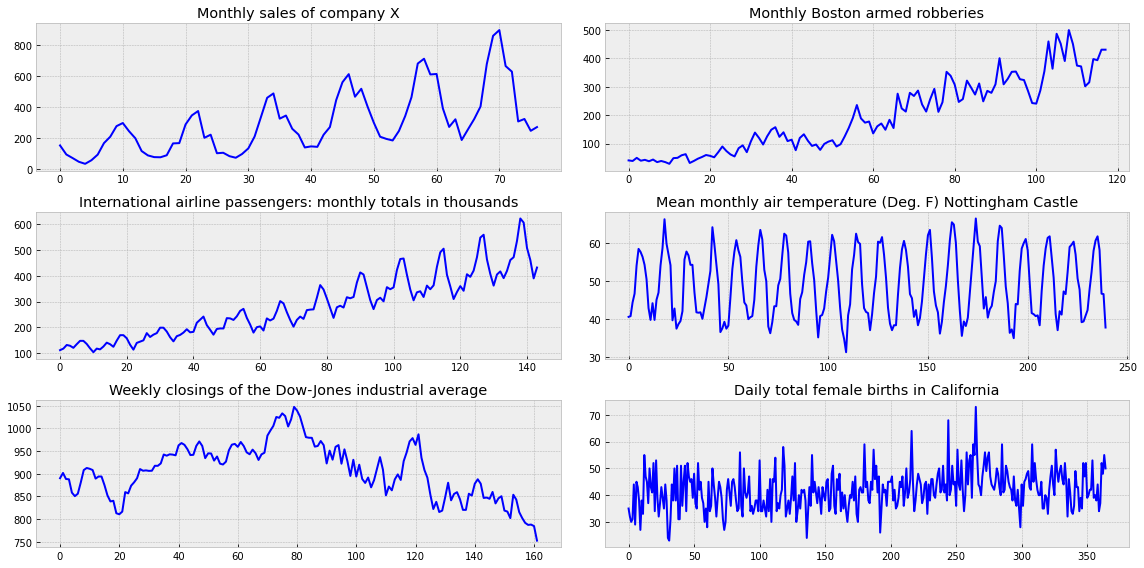

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

В функцию, представленной на лекции добавил ещё один параметр ts_title, чтобы можно было отобразить название графика.

In [6]:
def plot_ts_and_points(ts, ts_title ,start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        
        ts_ax = plt.axes()
        ts_ax.set_title(ts_title)
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

Создаю список ключей:

In [7]:
ask = list(all_series.keys())

In [8]:
ask[0]

'Monthly sales of company X'

Нарисуем все графики с отображением сезонности:

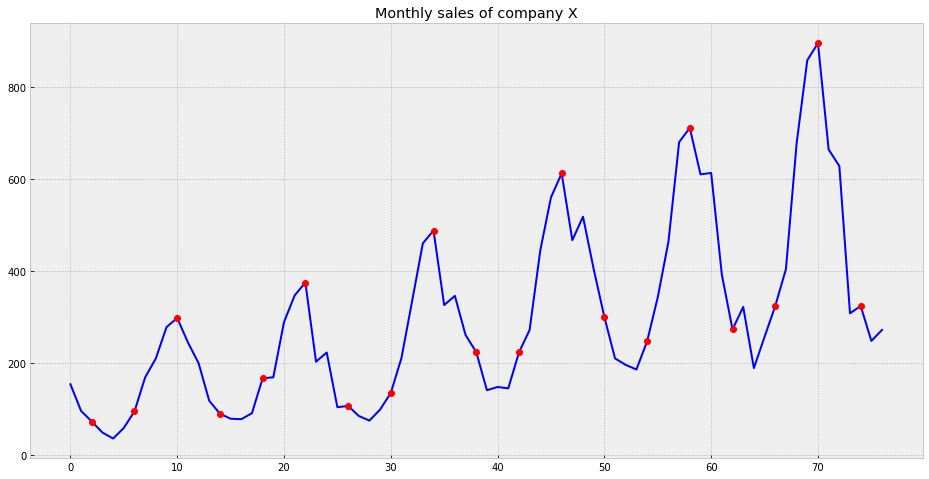

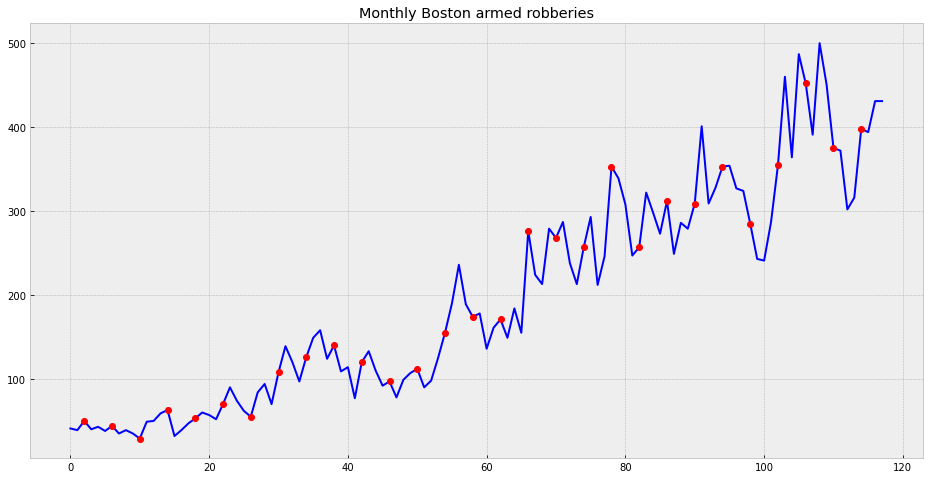

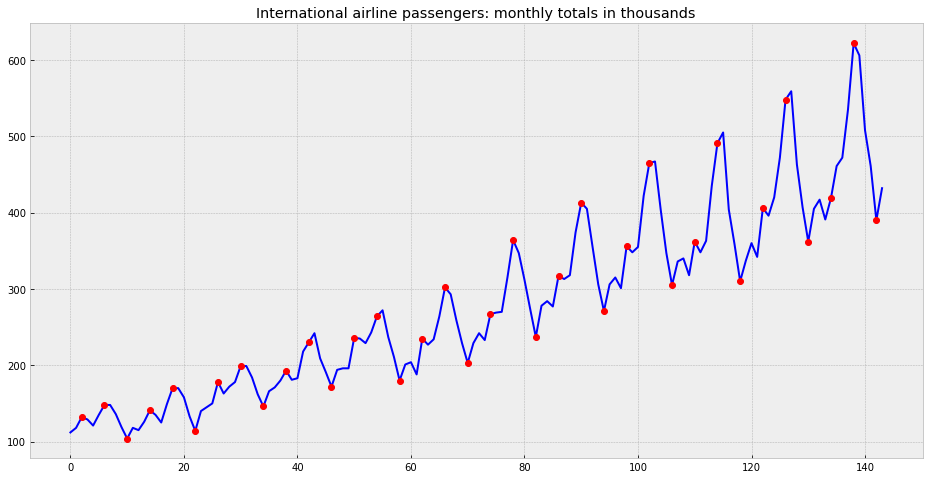

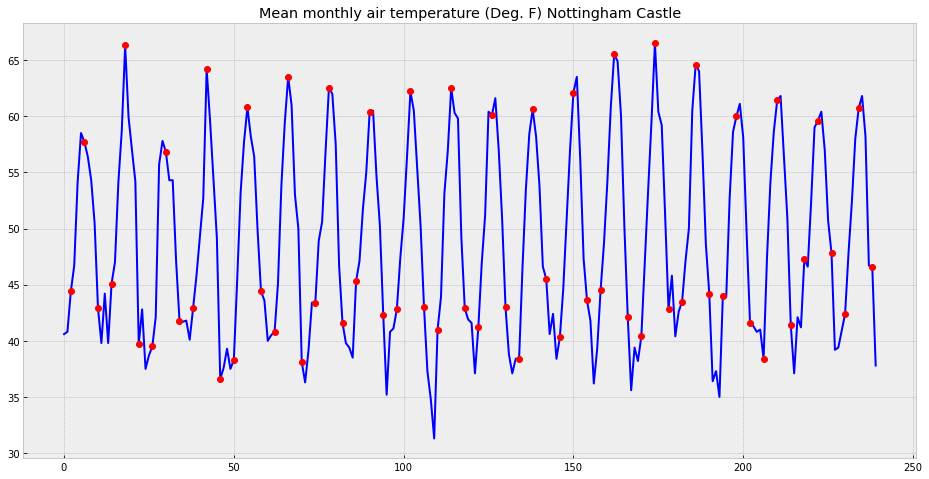

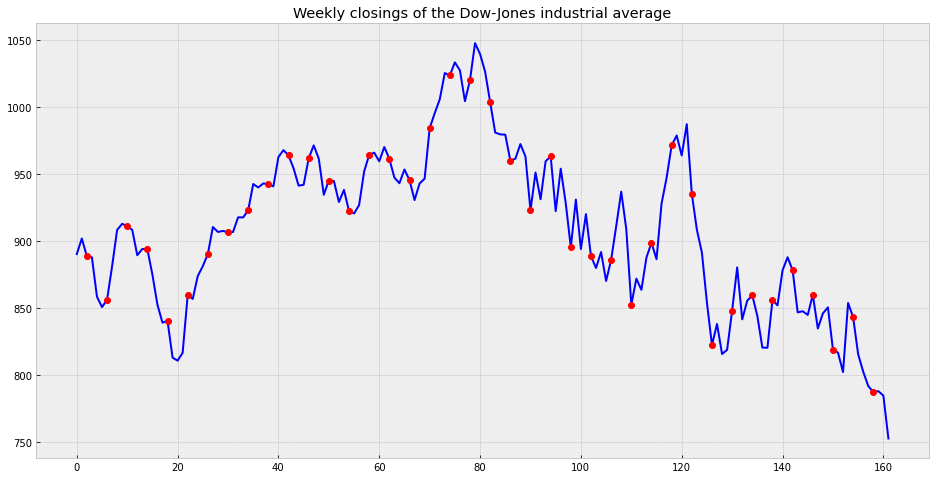

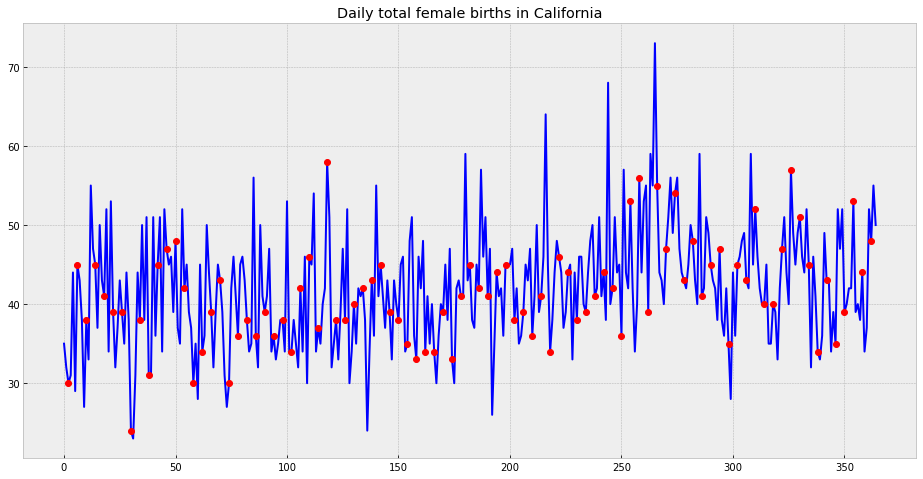

In [9]:
for i, key in enumerate(all_series.keys()):
    plot_ts_and_points(all_series[key], ask[i], 2, 4)

# Нормализуем дисперсию

Нам понадобится преобразование Бокса-Кокса. Применим для всех временных рядов. И отобразим на графиках.

In [10]:
from scipy.stats import boxcox

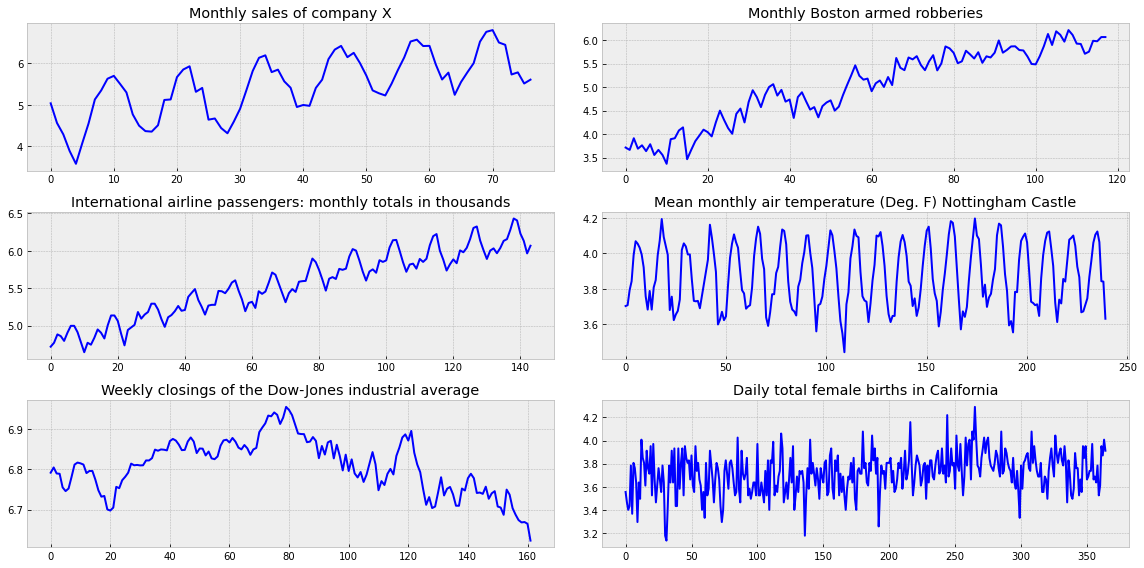

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        all_series[key] = boxcox(all_series[key], 0)
        ts_ax = plt.subplot2grid(layout, (y, x))
        plt.plot(all_series[key], color='blue')
        ts_ax.set_title(key)
    
    plt.tight_layout()

# Тест Дики-Фуллера 

Проверим графики на стационарность.

In [12]:
from statsmodels.tsa.stattools import adfuller

Также немного изменил функуцию, нам ведь важно по сути пока только p-value. Ввёл дополнительно ts_index переменную, в которую передаю строковое значение 'p-value'.

In [13]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries, ts_index):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(ts_index, f"{dfoutput[ts_index]:.2f}")

In [14]:
for key in all_series.keys():
    print('-----',key,':')
    test_stationarity(all_series[key], 'p-value')

----- Monthly sales of company X :
Results of Dickey-Fuller Test:
p-value 0.79
----- Monthly Boston armed robberies :
Results of Dickey-Fuller Test:
p-value 0.28
----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
p-value 0.42
----- Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
p-value 0.00
----- Weekly closings of the Dow-Jones industrial average :
Results of Dickey-Fuller Test:
p-value 0.67
----- Daily total female births in California :
Results of Dickey-Fuller Test:
p-value 0.00


Для двух временных рядов тест Дики-Фуллера показал значение p-value < 0.05, следовательно эти ряды стационарные, **согласно этого теста**, и не требуют обработки.  
Эти ряды *'Mean monthly air temperature (Deg. F) Nottingham Castle'* и *'Daily total female births in California'*.

# Коррелограммы

In [15]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

Передаём в функцию название графика с помощью переменной ts_title.

In [16]:
def tsplot(y, ts_title, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(ts_title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


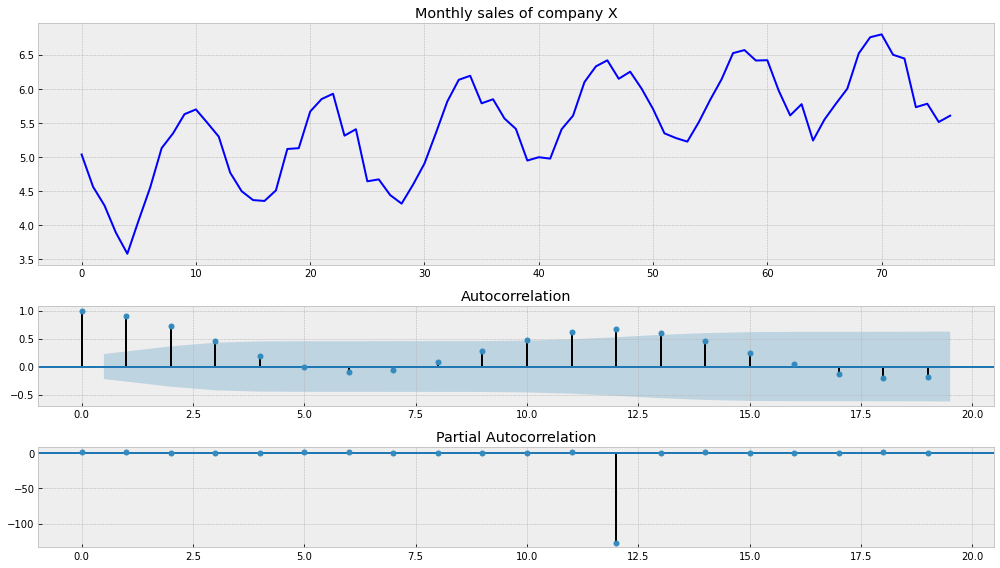

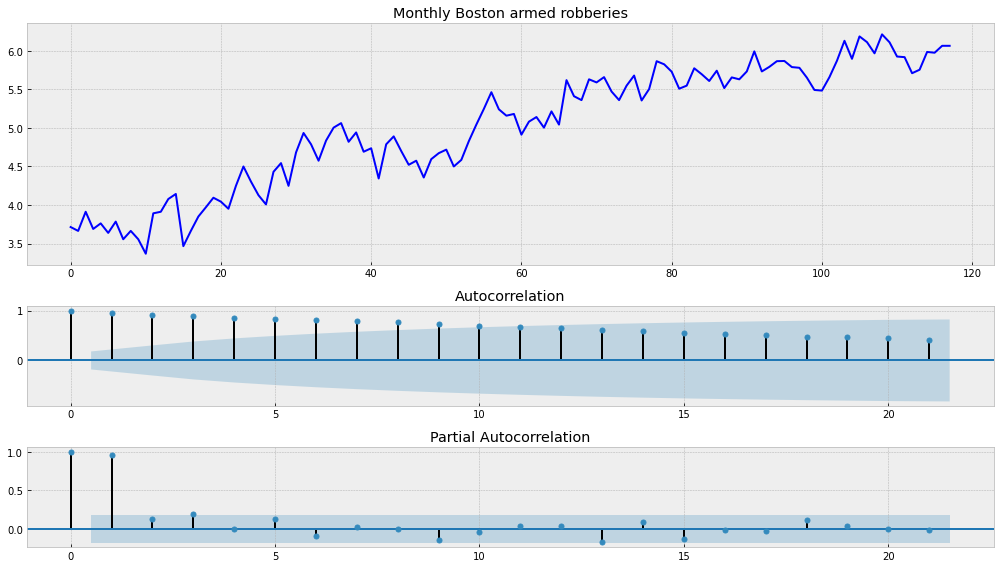

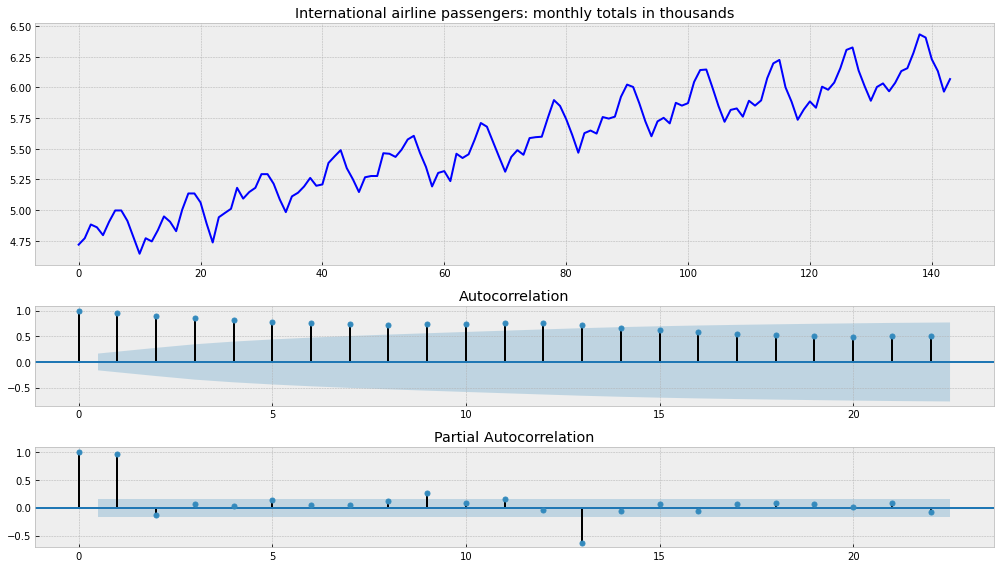

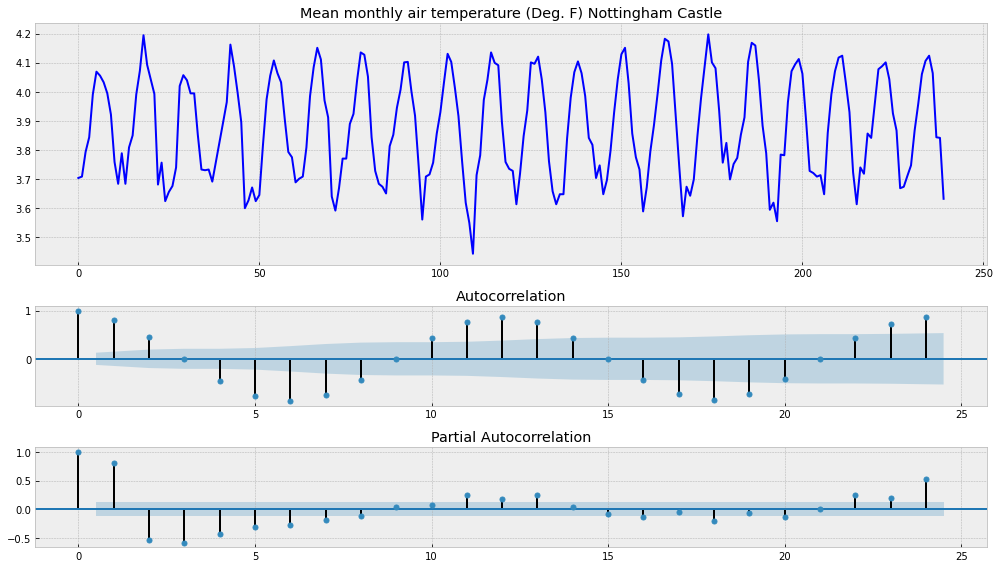

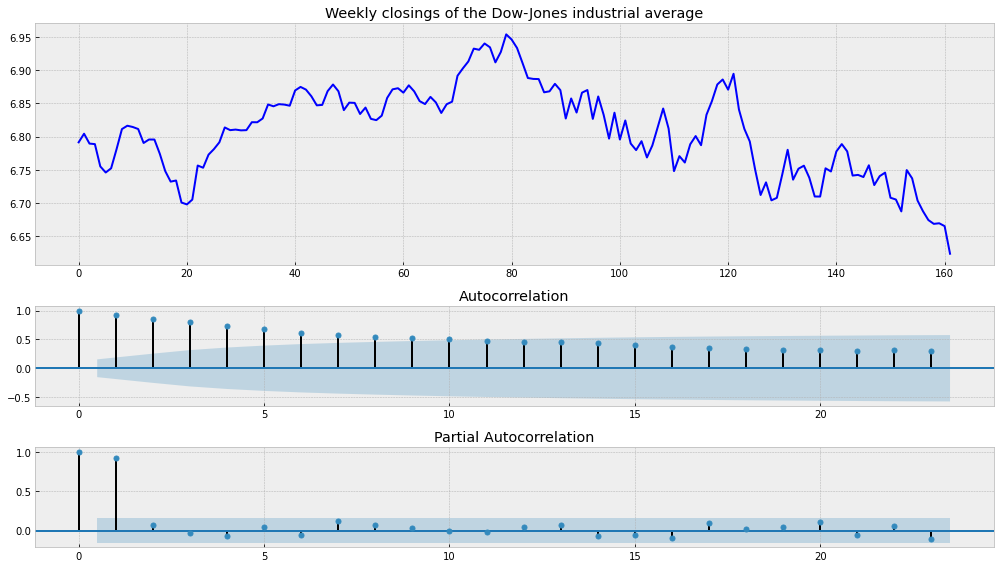

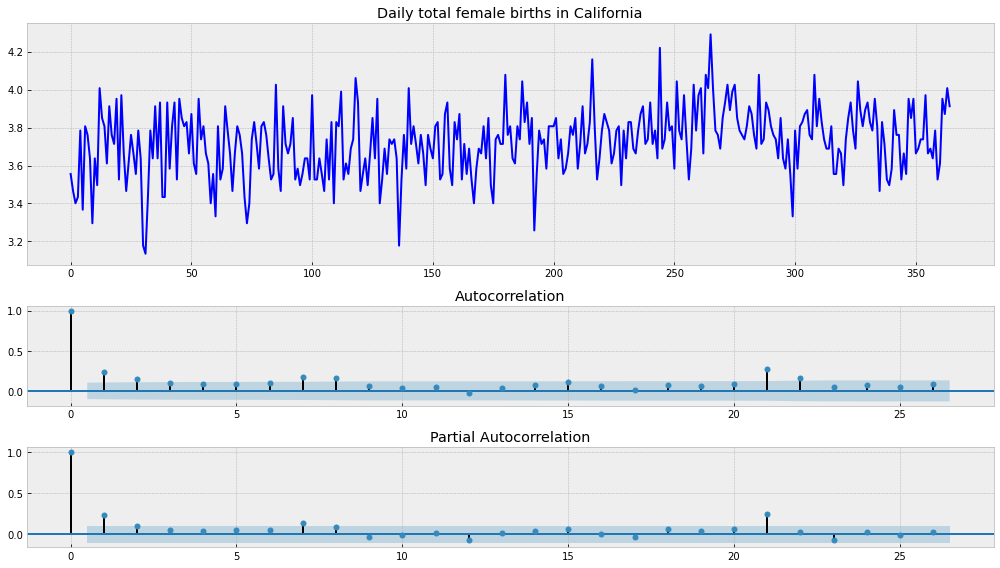

In [17]:
for i, key in enumerate(all_series.keys()):
    tsplot(all_series[key], key)

# Дифференцируем

In [18]:
import numpy as np

У нас тест Дики-Фуллера показал, что четыре ряда из шести по-прежнему сохраняют сезонность. Ряд *'Daily total female births in California'* и визуально показывает, что он стационарный. Но у ряда *'Mean monthly air temperature (Deg. F) Nottingham Castle'* при визуальном контроле наблюдается некоторая сезонность (цикличность). Продифференцируем все ряды, чтобы убрать сезонность. Но внимание обратим только на пять из шести временных рядов.

In [19]:
import copy
all_series_diff_1 = copy.copy(all_series)

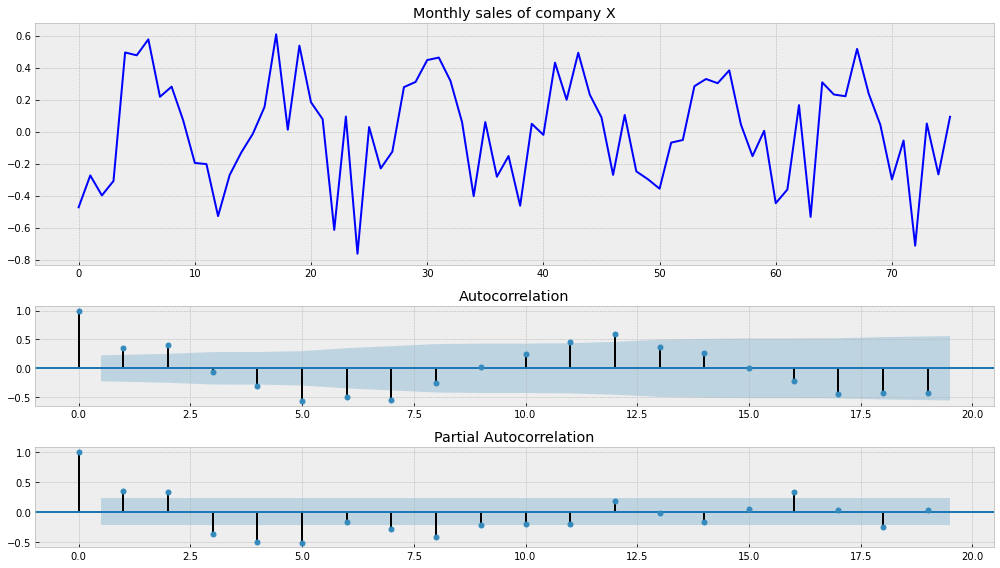

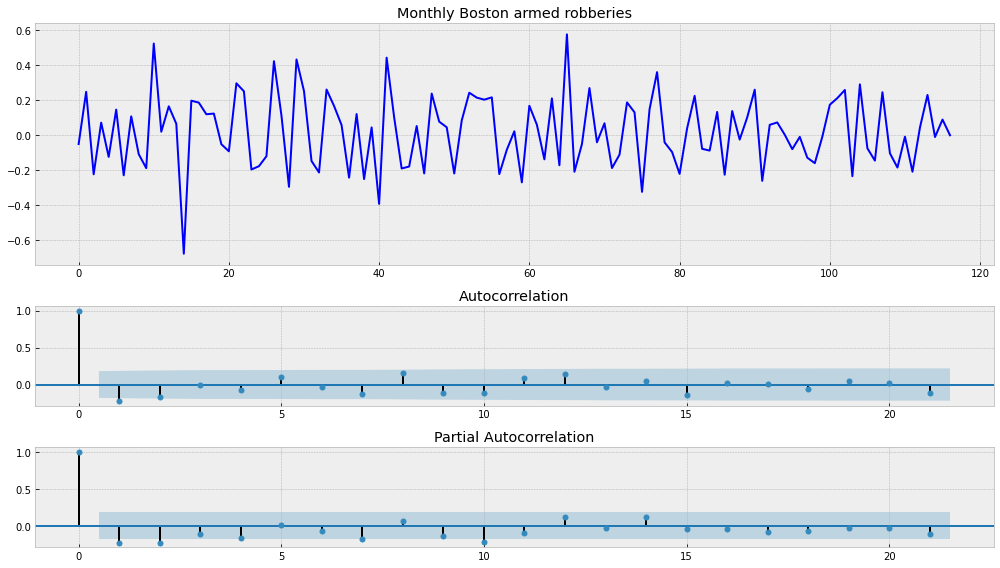

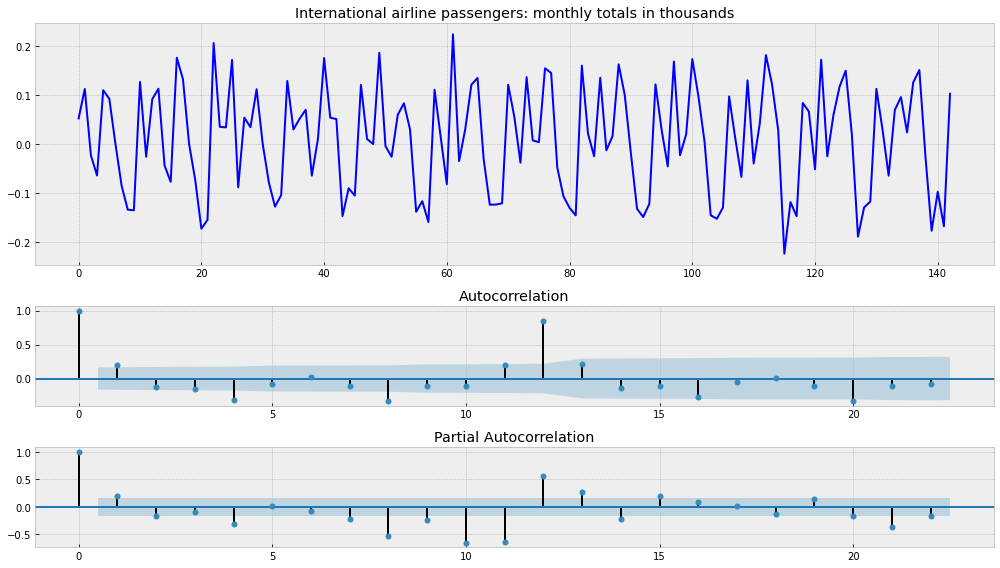

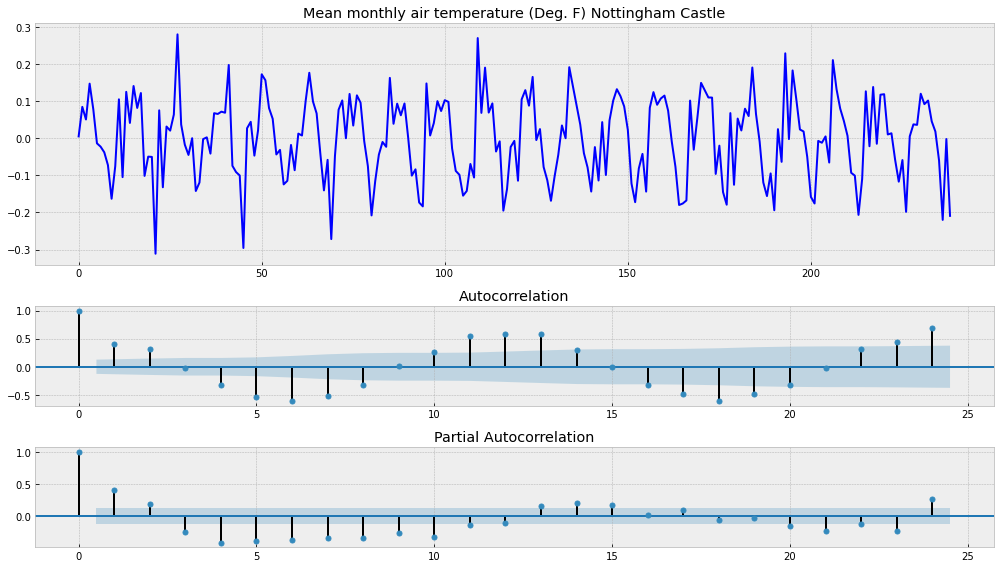

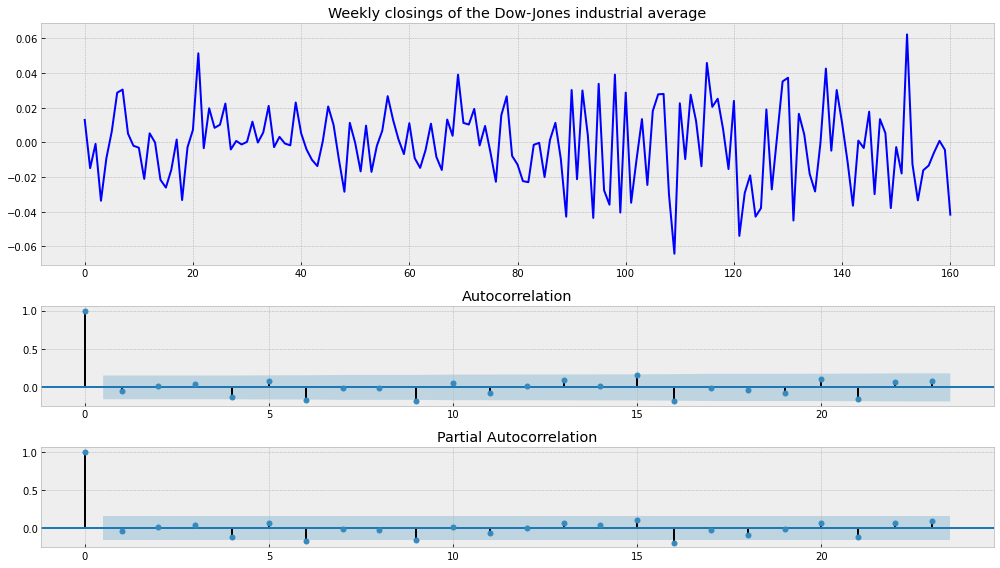

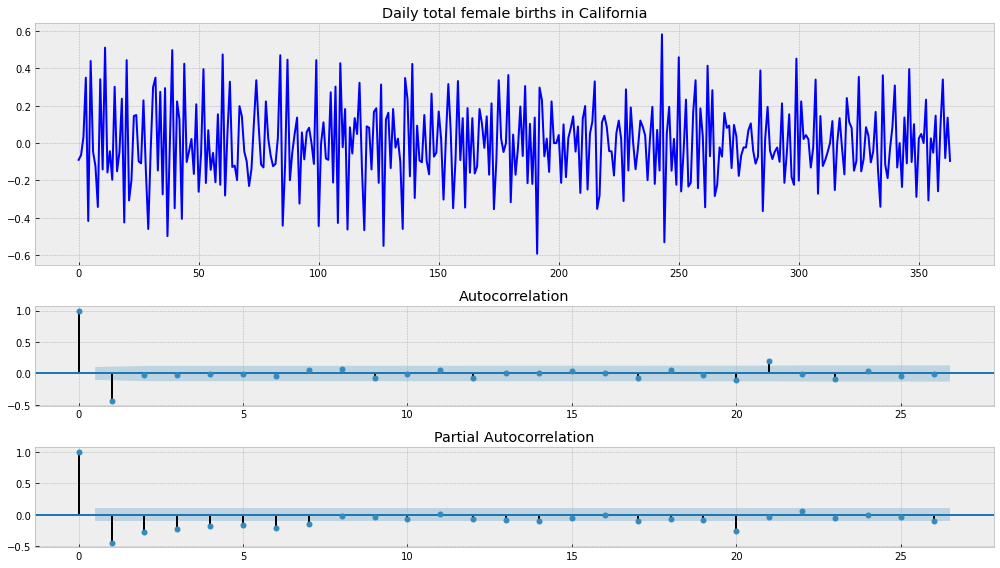

In [20]:
for key in all_series.keys():
    all_series_diff_1[key] = np.diff(all_series[key], 1) #all_series[key][1:] - all_series[key][:-1]
    tsplot(all_series_diff_1[key], key)

Повторим тест Дики-Фуллера для нового временного ряда, в котором мы избавились от сезонности.

In [21]:
for key in all_series.keys():
    print('-----',key,':')
    test_stationarity(all_series_diff_1[key], 'p-value')

----- Monthly sales of company X :
Results of Dickey-Fuller Test:
p-value 0.02
----- Monthly Boston armed robberies :
Results of Dickey-Fuller Test:
p-value 0.00
----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
p-value 0.07
----- Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
p-value 0.00
----- Weekly closings of the Dow-Jones industrial average :
Results of Dickey-Fuller Test:
p-value 0.00
----- Daily total female births in California :
Results of Dickey-Fuller Test:
p-value 0.00


Осталось два ряда, в которой надо убрать сезонность, **дополнительно к выполненному дифференцированию (первая разность)**. Это ряды *'Monthly sales of company X'* и *'International airline passengers: monthly totals in thousands'*.

In [22]:
#series_diff_1_season = copy.copy(all_series)
series_diff_1_season = copy.copy(all_series_diff_1)

In [23]:
series_diff_1_season.keys()

dict_keys(['Monthly sales of company X', 'Monthly Boston armed robberies', 'International airline passengers: monthly totals in thousands', 'Mean monthly air temperature (Deg. F) Nottingham Castle', 'Weekly closings of the Dow-Jones industrial average', 'Daily total female births in California'])

In [24]:
i = [1, 3 , 4, 5]
for el in i:
    del series_diff_1_season[ask[el]]
series_diff_1_season.keys()

dict_keys(['Monthly sales of company X', 'International airline passengers: monthly totals in thousands'])

Здесь ключевое слово "monthly"!  
Единственное стоит отметить, что для второго временного ряда автокорреляция это явно показывает, но для первого ряда мы это можем видеть в основном визуально.

In [25]:
for key in series_diff_1_season.keys():
    series_diff_1_season[key] = series_diff_1_season[key][12:] - series_diff_1_season[key][:-12]

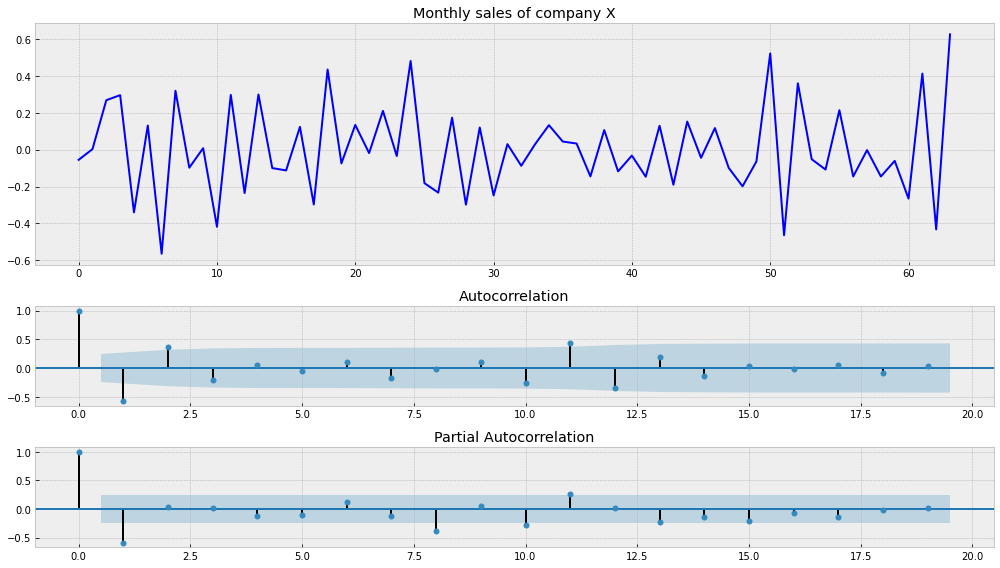

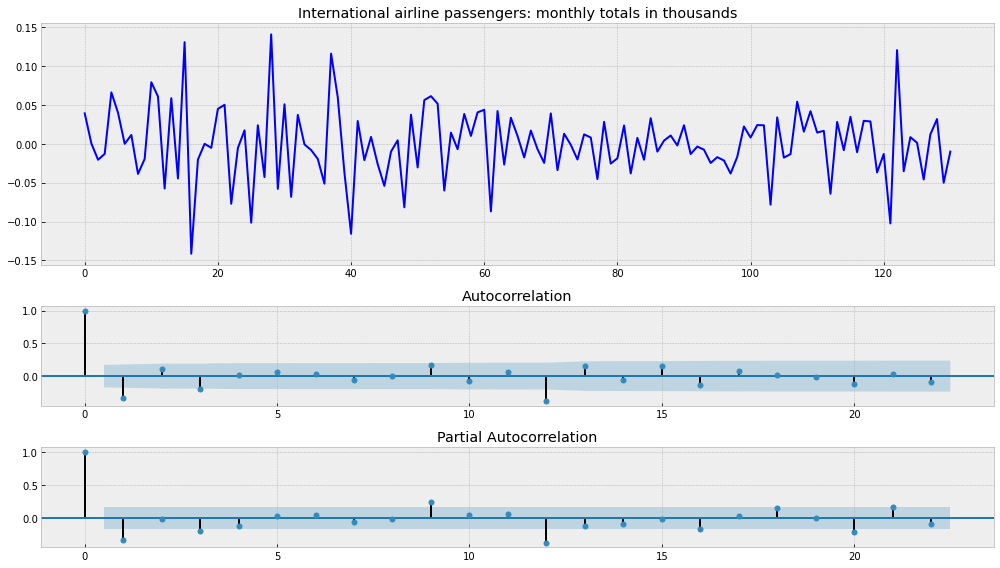

In [26]:
for key in series_diff_1_season.keys():
    tsplot(series_diff_1_season[key], key)

In [27]:
for key in series_diff_1_season.keys():
    print('-----',key,':')
    test_stationarity(series_diff_1_season[key], 'p-value')

----- Monthly sales of company X :
Results of Dickey-Fuller Test:
p-value 0.17
----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
p-value 0.00


Ряд 'Monthly sales of company X' уже был стационарен (p-value составляло  0.02) и дополнительное предположение, основанное на визуальном и словесном анализе привело к нестационарности ряда (p-value увеличилось до 0.17). Поэтому дополнительного совершенства не требовалось.  
А вот для ряда 'International airline passengers: monthly totals in thousands' вышеуказанная процедура пошла на пользу. Временной ряд теперь стационарен, как и все в нашей серии на определённом шаге обработки.